# QF600 Assignment 1

###### Prepared By:
Gabriel Woon

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
data = pd.read_excel('Industry_Portfolios.xlsx')
data = data.drop('Date', axis=1)

# Key Statistics

In [3]:
# mean returns 
muvec = data.mean(); muvec

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [4]:
# standard deviation
sigmavec = data.std(); sigmavec

NoDur    3.345657
Durbl    8.361852
Manuf    5.310270
Enrgy    6.081524
HiTec    5.381191
Telcm    4.448284
Shops    4.093786
Hlth     3.787172
Utils    3.701763
Other    5.582452
dtype: float64

In [5]:
# mean & standard deviation summary
pd.merge(pd.DataFrame(muvec,columns=["Mean Returns"]),
         pd.DataFrame(sigmavec,columns=["Standard Deviation"]),
         left_index=True, right_index=True)

,Mean Returns,Standard Deviation
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [6]:
# covariance matrix
cov = np.cov(data, rowvar=False)
display(np.round(data.cov(), decimals=5))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.19342,18.44967,14.10491,10.53134,12.92295,11.96808,10.17083,9.95311,7.86665,14.43841
Durbl,18.44967,69.92058,39.17810,27.01979,35.46665,27.49054,27.44473,16.82400,12.74614,39.36199
Manuf,14.10491,39.17810,28.19897,23.14538,24.61874,19.55015,17.62287,13.59645,11.44061,26.31342
Enrgy,10.53134,27.01979,23.14538,36.98493,19.26728,15.36682,11.29780,9.63033,14.02717,18.32047
HiTec,12.92295,35.46665,24.61874,19.26728,28.95722,18.70827,17.83711,13.25406,10.30419,23.85547
Telcm,11.96808,27.49054,19.55015,15.36682,18.70827,19.78723,14.16936,11.50660,10.99160,19.61084
Shops,10.17083,27.44473,17.62287,11.29780,17.83711,14.16936,16.75908,10.17885,6.69435,19.22652
Hlth,9.95311,16.82400,13.59645,9.63033,13.25406,11.50660,10.17885,14.34267,7.47504,14.86455
Utils,7.86665,12.74614,11.44061,14.02717,10.30419,10.99160,6.69435,7.47504,13.70305,9.99296
Other,14.43841,39.36199,26.31342,18.32047,23.85547,19.61084,19.22652,14.86455,9.99296,31.16377


# Variables

In [7]:
# V-1 = inverse matrix of covariance
vinv = np.linalg.inv(cov)

# R = vector of mean returns 
muVEC = muvec

# e = n x 1 vector of ones
ones = np.ones(len(muvec))

# delta = δ = e′V−1e
delta = ones.T@vinv@ones

# alpha = α = R′V−1e
alpha = muVEC.T@vinv@ones

# zeta = ζ = R′V−1R
zeta = muvec.T@vinv@muvec

# a = 1st unknown for weights 
a = (zeta*vinv@ones - alpha*vinv@muvec)/(zeta*delta-alpha**2)

# b = 2nd unknown for weights
b = (delta*vinv@muvec - alpha*vinv@ones)/(zeta*delta-alpha**2)

# Minimum Variance Portfolio (MV)

In [8]:
# minimum variance portfolio returns
muMV = alpha/delta; muMV

1.0040443340832625

In [9]:
# minimum variance portfolio standard deviation
sigmaMV = (1/delta)**0.5; sigmaMV

2.697902407534036

In [10]:
# minimum variance portfolio weights
wMV = a+b*muMV
display(pd.DataFrame(wMV.reshape(1,10), index=["Weights"], columns=data.columns))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights,0.543536,-0.109556,-0.15107,0.066282,-0.073712,-0.149203,0.589276,0.142921,0.315347,-0.173823


# Minimum Variance Frontier (MVF)

In [11]:
# minimum variance frontier portfolios returns
muMVF = np.arange(0, 2.01 , 0.1); muMVF

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [12]:
# minimum variance frontier portfolios standard deviation
sigmaMVF = ((1/delta)+(delta/(zeta*delta-alpha**2))*(muMVF-muMV)**2)**0.5; sigmaMVF

array([4.96865933, 4.62520378, 4.29451081, 3.97976317, 3.68504889,
       3.41555771, 3.17771336, 2.97910534, 2.82801233, 2.73232821,
       2.69795476, 2.7272112 , 2.81811651, 2.96500574, 3.16008166,
       3.39504812, 3.66223513, 3.9551181 , 4.26841081, 4.59794314,
       4.94046659])

In [13]:
# minimum variance frontier data points
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.concat((pd.DataFrame(muMVF, columns=["Returns"]), 
           pd.DataFrame(sigmaMVF, columns=["Standard Deviation"])), 
           axis = 1)

,Returns,Standard Deviation
0,0.0,4.968659
1,0.1,4.625204
2,0.2,4.294511
3,0.3,3.979763
4,0.4,3.685049
5,0.5,3.415558
6,0.6,3.177713
7,0.7,2.979105
8,0.8,2.828012
9,0.9,2.732328


## Plot the Minimum Variance Portfolio (MV) & Minimum Variance Frontier (MVF)

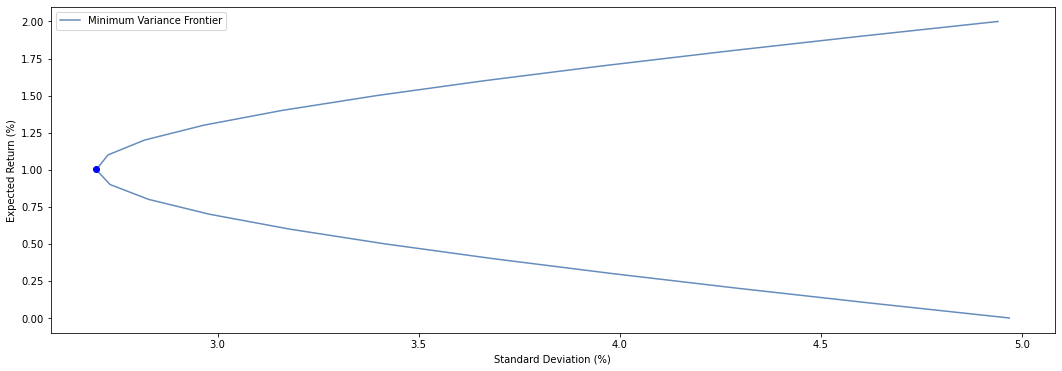

In [14]:
plt.figure(figsize = (18, 6))

plt.plot(sigmaMVF, muMVF, 'xkcd:faded blue')
plt.plot(sigmaMV, muMV, 'bo')

plt.ylabel('Expected Return (%)')
plt.xlabel('Standard Deviation (%)')
plt.legend(["Minimum Variance Frontier"], loc=2)

# Tangency Portfolio (TAN)

In [15]:
# risk free rate
Rf = 0.13

In [16]:
# tangency portfolio returns
muTAN = ((alpha*Rf)-zeta)/((delta*Rf)-alpha); muTAN

1.4862735358446901

In [17]:
# tangency portfolio standard deviation
sigmaTAN = -(zeta-2*alpha*Rf+(delta*Rf**2))**0.5/(delta*(Rf-muMV)); sigmaTAN

3.360726330566364

In [18]:
#tangency portfolio weights
wTAN = a+b*muTAN
display(pd.DataFrame(wTAN.reshape(1,10), index=["Weights"], columns=data.columns))

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weights,0.567972,-0.214073,0.714105,0.104087,-0.363438,-0.095463,0.991647,0.07557,0.132643,-0.913051


In [19]:
# tangency portfolio sharpe ratio
srTAN = (zeta-2*alpha*Rf+delta*Rf**2)**0.5 ; srTAN

0.4035655993495088

# Efficient Frontier (EF)

In [20]:
# efficient frontier portfolios returns
muEF = muMVF[muMVF>=Rf]; muEF

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [21]:
# efficient frontier portfolios standard deviation
sigmaEF = ((muEF-Rf)**2/(zeta-2*alpha*Rf+delta*Rf**2))**0.5; sigmaEF

array([0.17345383, 0.42124502, 0.66903621, 0.9168274 , 1.16461859,
       1.41240978, 1.66020097, 1.90799216, 2.15578335, 2.40357454,
       2.65136573, 2.89915692, 3.14694811, 3.3947393 , 3.64253049,
       3.89032168, 4.13811287, 4.38590406, 4.63369525])

In [22]:
# efficient frontier portfolios data points
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.concat((pd.DataFrame(muEF, columns=["Returns"]), 
           pd.DataFrame(sigmaEF, columns=["Standard Deviation"])), 
           axis = 1)

,Returns,Standard Deviation
0,0.2,0.173454
1,0.3,0.421245
2,0.4,0.669036
3,0.5,0.916827
4,0.6,1.164619
5,0.7,1.412410
6,0.8,1.660201
7,0.9,1.907992
8,1.0,2.155783
9,1.1,2.403575


## Plot the Tangency Portfolio (T) & Efficient Frontier (EF)

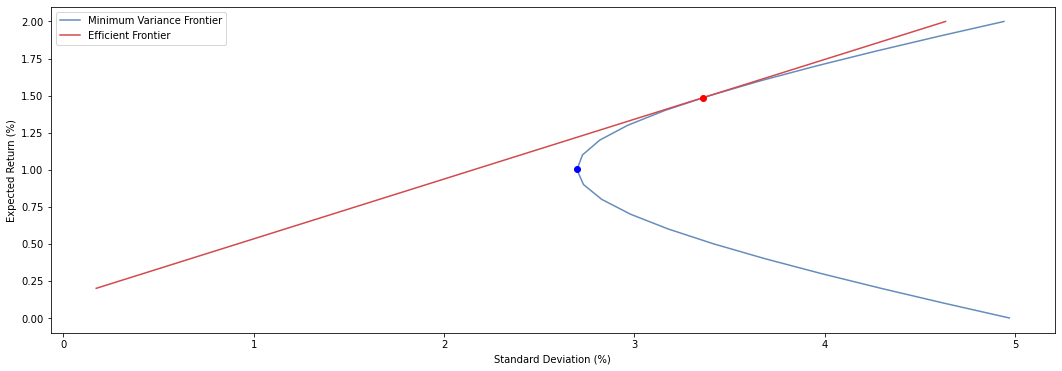

In [23]:
plt.figure(figsize = (18, 6))
plt.plot(sigmaMVF, muMVF,'xkcd:faded blue')
plt.plot(sigmaEF, muEF,'xkcd:faded red')
plt.plot(sigmaMV, muMV,'bo')
plt.plot(sigmaTAN, muTAN, 'ro')

plt.ylabel('Expected Return (%)')
plt.xlabel('Standard Deviation (%)')
plt.legend(["Minimum Variance Frontier", "Efficient Frontier"], loc=2)